<a href="https://colab.research.google.com/github/dlcastan/ProyectoDSII/blob/main/ProyectoDSII_ParteI_Lopez_Castan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Curso:** Data Science II: Machine Learning para la Ciencia de Datos
# **Comisión 61175**
# **Alumno:** Diego Lopez Castan

# **Presentación del proyecto**

# Abstract

Este conjunto de datos contiene información detallada sobre los mejores libros en el site goodreads.com. Cada registro incluye datos como el nombre el libro y el autor, el precio, las opiniones y algunos datos más.


# Objetivo

**Analizar las relaciones entre el rating de un libro y sus géneros:**
Identificar si ciertos géneros están asociados con mejores ratings en general.

**Estudio de popularidad por series literarias:** Evaluar el impacto de pertenecer a una serie en el éxito de los libros (por ejemplo, comparar el rating de los libros de una serie con otros libros del mismo autor que no pertenecen a una serie).

**Segmentación por idioma y género:** Estudiar la distribución de géneros según los diferentes idiomas de los libros y su relación con los ratings.

**Relación entre la longitud del libro y el éxito de un libro:** Investigar si los libros más cortos o más largos tienen alguna ventaja en términos de popularidad (rating).

**Estudio de la relación entre el número de géneros y el rating de un libro:** Analizar si los libros que pertenecen a un genero específico recibe mejor rating.


# Hipotesis

El dataset tiene la posibilidad de describir varias aristas sobre los libros más relevantes del sitio goodreads.com.


**Ciertos géneros están más asociados a libros con ratings altos:** Géneros como "Fantasía" y "Ciencia ficción" tienen mejores ratings promedio que géneros como "Romance" o "Ficción histórica".

**Los libros de ficcion tienen ratings más elevamos que los libros de no ficción:** Existe alguna diferencia entre los libros de ficción y no ficcion.

**Los libros basados en franquicias populares tienen peores ratings que libros originales:** Los libros derivados de franquicias como películas o videojuegos tienden a recibir peores críticas por ser vistos como menos originales.

**Los libros de ficción distópica tienen mejores ratings que los de ficción general:** Los libros categorizados como "distopía" tienen mejores críticas debido a la popularidad de este subgénero en los últimos años.

**Fuente**

https://www.kaggle.com/datasets/thedevastator/comprehensive-overview-of-52478-goodreads-best-b

#**Lectura de datos**

# Campos del dataset

**title:** El título del libro. (Cadena de texto)

**series:** La serie a la que pertenece el libro, si es que pertenece a alguna. (Cadena de texto)

**author:** El autor del libro. (Cadena de texto)

**rating:** La calificación promedio del libro en GoodReads. (Flotante)

**description:** Una breve descripción del libro. (Cadena de texto)

**language:** El idioma en el que está escrito el libro. (Cadena de texto)

**isbn:** El número ISBN del libro. (Cadena de texto)

**genres:** Los géneros en los que se clasifica el libro. (Cadena de texto)

**characters:** Los personajes que aparecen en el libro. (Cadena de texto)

**bookFormat:** El formato del libro (por ejemplo, tapa blanda o libro electrónico). (Cadena de texto)

**edition:** La edición del libro. (Cadena de texto)

**pages:** El número de páginas del libro. (Entero)

**publisher:** El editor del libro. (Cadena de texto)

**publishDate:** La fecha en la que el libro fue publicado. (Fecha)

**firstPublishDate:** La fecha en la que el libro fue publicado por primera vez. (Fecha)

**awards:** Cualquier premio que el libro haya recibido. (Cadena de texto)

**numRatings:** El número de calificaciones que ha recibido el libro. (Entero)

**ratingsByStars:** Las calificaciones del libro desglosadas por número de estrellas. (Cadena de texto)

**likedPercent:** El porcentaje de lectores a los que les gustó el libro. (Flotante)

**setting:** El escenario en el que se desarrolla el libro. (Cadena de texto)

**coverImg:** La imagen de portada del libro. (Cadena de texto)

**bbeScore** La puntuación del libro en la lista de los mejores libros de GoodReads. (Flotante)

**bbeVotes:** El número de votos emitidos para el libro en la lista de los mejores libros de GoodReads. (Entero)

**price:** El precio del libro. (Flotante)




# Campos creados

**Rating_entero:** es el ranking del libro pero como numero entero.

**popularidad:** tiene el valor 0 para los valores negativos, el valor 1 para los rankearon el libro dentro de los 3 puntos y el valor 2 para los que definieron enter 4 y 5.

**con_serie:** indica si el libro forma parte de una serie de libros.

**con_premio:** indica si el libro posee algún premio.

**cant_stars_X:** es la cantidad de calificaciones por estrella.




# Analisis Descriptivo

In [1]:
# Cargo las librerías
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
# Descargo archivo .csv
!gdown 1auvV-lfbQTtzENyVjRkkP3RWWlRmhASj

Downloading...
From: https://drive.google.com/uc?id=1auvV-lfbQTtzENyVjRkkP3RWWlRmhASj
To: /content/books_1.Best_Books_Ever.csv
100% 73.8M/73.8M [00:01<00:00, 60.4MB/s]


In [3]:
# Leo archivo
url = '/content/books_1.Best_Books_Ever.csv'
data = pd.read_csv(url, header=0, on_bad_lines='skip')

# Muestro dataframe
data.head()

,bookId,title,series,author,rating,description,language,isbn,genres,characters,...,firstPublishDate,awards,numRatings,ratingsByStars,likedPercent,setting,coverImg,bbeScore,bbeVotes,price
0,2767052-the-hunger-games,The Hunger Games,The Hunger Games #1,Suzanne Collins,4.33,WINNING MEANS FAME AND FORTUNE.LOSING MEANS CE...,English,9780439023481,"['Young Adult', 'Fiction', 'Dystopia', 'Fantas...","['Katniss Everdeen', 'Peeta Mellark', 'Cato (H...",...,NaN,['Locus Award Nominee for Best Young Adult Boo...,6376780,"['3444695', '1921313', '745221', '171994', '93...",96.0,"['District 12, Panem', 'Capitol, Panem', 'Pane...",https://i.gr-assets.com/images/S/compressed.ph...,2993816,30516,5.09
1,2.Harry_Potter_and_the_Order_of_the_Phoenix,Harry Potter and the Order of the Phoenix,Harry Potter #5,"J.K. Rowling, Mary GrandPré (Illustrator)",4.50,There is a door at the end of a silent corrido...,English,9780439358071,"['Fantasy', 'Young Adult', 'Fiction', 'Magic',...","['Sirius Black', 'Draco Malfoy', 'Ron Weasley'...",...,06/21/03,['Bram Stoker Award for Works for Young Reader...,2507623,"['1593642', '637516', '222366', '39573', '14526']",98.0,['Hogwarts School of Witchcraft and Wizardry (...,https://i.gr-assets.com/images/S/compressed.ph...,2632233,26923,7.38
2,2657.To_Kill_a_Mockingbird,To Kill a Mockingbird,To Kill a Mockingbird,Harper Lee,4.28,The unforgettable novel of a childhood in a sl...,English,9999999999999,"['Classics', 'Fiction', 'Historical Fiction', ...","['Scout Finch', 'Atticus Finch', 'Jem Finch', ...",...,07/11/60,"['Pulitzer Prize for Fiction (1961)', 'Audie A...",4501075,"['2363896', '1333153', '573280', '149952', '80...",95.0,"['Maycomb, Alabama (United States)']",https://i.gr-assets.com/images/S/compressed.ph...,2269402,23328,NaN
3,1885.Pride_and_Prejudice,Pride and Prejudice,NaN,"Jane Austen, Anna Quindlen (Introduction)",4.26,Alternate cover edition of ISBN 9780679783268S...,English,9999999999999,"['Classics', 'Fiction', 'Romance', 'Historical...","['Mr. Bennet', 'Mrs. Bennet', 'Jane Bennet', '...",...,01/28/13,[],2998241,"['1617567', '816659', '373311', '113934', '767...",94.0,"['United Kingdom', 'Derbyshire, England (Unite...",https://i.gr-assets.com/images/S/compressed.ph...,1983116,20452,NaN
4,41865.Twilight,Twilight,The Twilight Saga #1,Stephenie Meyer,3.60,About three things I was absolutely positive.\...,English,9780316015844,"['Young Adult', 'Fantasy', 'Romance', 'Vampire...","['Edward Cullen', 'Jacob Black', 'Laurent', 'R...",...,10/05/05,"['Georgia Peach Book Award (2007)', 'Buxtehude...",4964519,"['1751460', '1113682', '1008686', '542017', '5...",78.0,"['Forks, Washington (United States)', 'Phoenix...",https://i.gr-assets.com/images/S/compressed.ph...,1459448,14874,2.1


## Analisis Básico

In [4]:
# Información sobre el dataframe
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52478 entries, 0 to 52477
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   bookId            52478 non-null  object 
 1   title             52478 non-null  object 
 2   series            23470 non-null  object 
 3   author            52478 non-null  object 
 4   rating            52478 non-null  float64
 5   description       51140 non-null  object 
 6   language          48672 non-null  object 
 7   isbn              52478 non-null  object 
 8   genres            52478 non-null  object 
 9   characters        52478 non-null  object 
 10  bookFormat        51005 non-null  object 
 11  edition           4955 non-null   object 
 12  pages             50131 non-null  object 
 13  publisher         48782 non-null  object 
 14  publishDate       51598 non-null  object 
 15  firstPublishDate  31152 non-null  object 
 16  awards            52478 non-null  object

In [5]:
#Identifico todas las columnas de mi dataframe
data.columns

Index(['bookId', 'title', 'series', 'author', 'rating', 'description',
       'language', 'isbn', 'genres', 'characters', 'bookFormat', 'edition',
       'pages', 'publisher', 'publishDate', 'firstPublishDate', 'awards',
       'numRatings', 'ratingsByStars', 'likedPercent', 'setting', 'coverImg',
       'bbeScore', 'bbeVotes', 'price'],
      dtype='object')

In [6]:
#Describo los tipos de datos
data.dtypes

,0
bookId,object
title,object
series,object
author,object
rating,float64
description,object
language,object
isbn,object
genres,object
characters,object


In [7]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
rating,52478.0,4.021878,0.367146,0.0,3.82,4.03,4.23,5.0
numRatings,52478.0,17878.649263,103944.778529,0.0,341.00,2307.00,9380.50,7048471.0
likedPercent,51856.0,92.231545,5.990689,0.0,90.00,94.00,96.00,100.0
bbeScore,52478.0,1984.023305,35153.144366,0.0,84.00,97.00,187.00,2993816.0
bbeVotes,52478.0,22.529003,369.158541,-4.0,1.00,1.00,2.00,30516.0


# **Limpieza y transformación de datos**

### Datos Duplicados

In [8]:
#Controlo si existen datos duplicados
data.duplicated().sum()

50

In [9]:
#Identifico las filas duplicadas
duplicados_con_original = data[data.duplicated(keep=False)]

In [10]:
# Creo dataframe con los datos duplicados
solo_duplicados = data[data.duplicated]

In [11]:
solo_duplicados

,bookId,title,series,author,rating,description,language,isbn,genres,characters,...,firstPublishDate,awards,numRatings,ratingsByStars,likedPercent,setting,coverImg,bbeScore,bbeVotes,price
37431,8794263-promises-to-keep,Promises to Keep,NaN,Ann Tatlock,3.94,Eleven-year-old Roz (Rosalind) Anthony and her...,English,9780764208096,"['Fiction', 'Christian Fiction', 'Christian', ...",[],...,01/01/11,[],1997,"['582', '833', '476', '84', '22']",95.0,['Illinois (United States)'],https://i.gr-assets.com/images/S/compressed.ph...,87,1,4.23
37432,1909590.Click,Click,NaN,"Eoin Colfer, Linda Sue Park, Ruth Ozeki (Goodr...",3.54,A video message from a dead person. A larcenou...,English,9781407105918,"['Young Adult', 'Fiction', 'Short Stories', 'M...",[],...,11/06/07,['Deutscher Jugendliteraturpreis Nominee for J...,1910,"['340', '647', '664', '214', '45']",86.0,[],https://i.gr-assets.com/images/S/compressed.ph...,87,1,2.60
37433,23394408-die-unendlichkeit-schl-ft,Die Unendlichkeit schläft,Loki von Schallern Staffel 1 #3,Melanie Meier,4.50,"Überall, wo er hingeht, reißen Höllenfeuer all...",German,B00O84Q7UG,[],[],...,NaN,[],2,[],NaN,[],https://i.gr-assets.com/images/S/compressed.ph...,87,1,NaN
37434,7544945-death-note,"Death Note: Black Edition, Vol. 2",Death Note: Black Edition #2,"Tsugumi Ohba, Takeshi Obata, Yuki Kowalsky (tr...",4.48,Intégrale regroupant les tomes 3 et 4Tome 3 :L...,German,9783867196727,"['Graphic Novels', 'Comics', 'Fantasy', 'Manga...","['Light Yagami', 'Ryuk']",...,11/06/03,[],5849,"['3339', '2045', '408', '44', '13']",99.0,[],https://i.gr-assets.com/images/S/compressed.ph...,87,1,12.00
37435,25886017-m-scaras,Máscaras,NaN,Ariel Dorfman,3.49,"¿Qué se oculta detrás de esos rostros difusos,...",Spanish,9500704919,"['Fiction', 'Literature']",[],...,01/01/88,[],77,"['17', '22', '23', '12', '3']",81.0,[],https://i.gr-assets.com/images/S/compressed.ph...,87,1,6.16
37436,2669775-el-siglo-de-las-luces,El siglo de las luces,NaN,Alejo Carpentier,4.13,El siglo de las luces novela el impacto de la ...,Spanish,9788402067074,"['Fiction', 'Spanish Literature', 'Historical ...",[],...,11/06/62,[],2282,"['979', '802', '368', '95', '38']",94.0,[],https://i.gr-assets.com/images/S/compressed.ph...,87,1,0.90
37437,24633605-always-and-forever,Always and Forever,Serenity Point #2,Harper Bentley (Goodreads Author),3.93,Does wanting to slap the hell out of Brody Kel...,English,9999999999999,"['Contemporary Romance', 'Romance', 'Firefight...",[],...,NaN,[],482,"['153', '188', '104', '26', '11']",92.0,[],https://i.gr-assets.com/images/S/compressed.ph...,87,1,NaN
37438,237086.Dafne_desvanecida,Dafne desvanecida,NaN,José Carlos Somoza,3.48,Dafne desvanecida presenta a un famoso escrito...,Spanish,9788423331970,"['Fiction', 'Mystery', 'Contemporary', 'Spanis...",[],...,NaN,['Premio Nadal Nominee (2000)'],204,"['37', '56', '82', '25', '4']",86.0,[],https://i.gr-assets.com/images/S/compressed.ph...,87,1,4.90
37439,17786377,فضولية العلم,NaN,"Cyril Aydon, أحمد مغربي (ترجمة)",3.87,"ما يلفت في كتاب سيرل أيدون ""فضولية العلم"" طريق...",Arabic,9781855166752,"['Science', 'Nonfiction']",[],...,10/01/05,[],91,"['25', '37', '21', '8', '0']",91.0,[],https://i.gr-assets.com/images/S/compressed.ph...,87,1,NaN
37440,7452583-jag-vill-inte-d-jag-vill-bara-inte-leva,"Jag vill inte dö, jag vill bara inte leva",NaN,Ann Heberlein,3.50,"Ann Heberleins omdiskuterade självbiografi""Jag...",Swedish,9789172321717,"['Nonfiction', 'Psychology', 'Biography', 'Men...",[],...,12/03/08,[],1032,"['153', '389', '338', '128', '24']",85.0,[],https://i.gr-assets.com/images/S/compressed.ph...,87,1,NaN


**Al revisar los valores que supuestamente son duplicados puedo ver que no es así. Los valores son todos distintos así que voy a dejarlos en el dataframe original.**

### Datos Nulos

In [12]:
#Controlo si existe valores nullos
data.isnull().sum()

,0
bookId,0
title,0
series,29008
author,0
rating,0
description,1338
language,3806
isbn,0
genres,0
characters,0


**Existen varios campos que contienen valores nulos. El valor más importante es el pricio que posee 14365 valores sin datos.**

In [13]:
# Eliminar filas donde los campo 'price', 'pages', 'likedPercent', 'bookFormat' son nulo
data_clean = data.dropna(subset=['price', 'pages', 'likedPercent', 'bookFormat'])

In [15]:
data_clean

,bookId,title,series,author,rating,description,language,isbn,genres,characters,...,firstPublishDate,awards,numRatings,ratingsByStars,likedPercent,setting,coverImg,bbeScore,bbeVotes,price
0,2767052-the-hunger-games,The Hunger Games,The Hunger Games #1,Suzanne Collins,4.33,WINNING MEANS FAME AND FORTUNE.LOSING MEANS CE...,English,9780439023481,"['Young Adult', 'Fiction', 'Dystopia', 'Fantas...","['Katniss Everdeen', 'Peeta Mellark', 'Cato (H...",...,NaN,['Locus Award Nominee for Best Young Adult Boo...,6376780,"['3444695', '1921313', '745221', '171994', '93...",96.0,"['District 12, Panem', 'Capitol, Panem', 'Pane...",https://i.gr-assets.com/images/S/compressed.ph...,2993816,30516,5.09
1,2.Harry_Potter_and_the_Order_of_the_Phoenix,Harry Potter and the Order of the Phoenix,Harry Potter #5,"J.K. Rowling, Mary GrandPré (Illustrator)",4.50,There is a door at the end of a silent corrido...,English,9780439358071,"['Fantasy', 'Young Adult', 'Fiction', 'Magic',...","['Sirius Black', 'Draco Malfoy', 'Ron Weasley'...",...,06/21/03,['Bram Stoker Award for Works for Young Reader...,2507623,"['1593642', '637516', '222366', '39573', '14526']",98.0,['Hogwarts School of Witchcraft and Wizardry (...,https://i.gr-assets.com/images/S/compressed.ph...,2632233,26923,7.38
4,41865.Twilight,Twilight,The Twilight Saga #1,Stephenie Meyer,3.60,About three things I was absolutely positive.\...,English,9780316015844,"['Young Adult', 'Fantasy', 'Romance', 'Vampire...","['Edward Cullen', 'Jacob Black', 'Laurent', 'R...",...,10/05/05,"['Georgia Peach Book Award (2007)', 'Buxtehude...",4964519,"['1751460', '1113682', '1008686', '542017', '5...",78.0,"['Forks, Washington (United States)', 'Phoenix...",https://i.gr-assets.com/images/S/compressed.ph...,1459448,14874,2.1
5,19063.The_Book_Thief,The Book Thief,NaN,Markus Zusak (Goodreads Author),4.37,Librarian's note: An alternate cover edition c...,English,9780375831003,"['Historical Fiction', 'Fiction', 'Young Adult...","['Liesel Meminger', 'Hans Hubermann', 'Rudy St...",...,09/01/05,['National Jewish Book Award for Children’s an...,1834276,"['1048230', '524674', '186297', '48864', '26211']",96.0,"['Molching (Germany)', 'Germany']",https://i.gr-assets.com/images/S/compressed.ph...,1372809,14168,3.8
6,170448.Animal_Farm,Animal Farm,NaN,"George Orwell, Russell Baker (Preface), C.M. W...",3.95,Librarian's note: There is an Alternate Cover ...,English,9780451526342,"['Classics', 'Fiction', 'Dystopia', 'Fantasy',...","['Snowball', 'Napoleon', 'Clover', 'Boxer', 'O...",...,08/17/45,"['Prometheus Hall of Fame Award (2011)', 'Retr...",2740713,"['986764', '958699', '545475', '165093', '84682']",91.0,"['England', 'United Kingdom']",https://i.gr-assets.com/images/S/compressed.ph...,1276599,13264,4.42
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52470,11115191-attracted-to-fire,Attracted to Fire,NaN,DiAnn Mills (Goodreads Author),4.14,Special Agent Meghan Connors' dream of one day...,English,9781414348643,"['Christian Fiction', 'Christian', 'Suspense',...",[],...,September 16th 2011,['HOLT Medallion by Virginia Romance Writers N...,2143,"['945', '716', '365', '78', '39']",95.0,['West Texas (United States)'],https://i.gr-assets.com/images/S/compressed.ph...,0,1,5.55
52472,12395883-unbelievable,Unbelievable,Port Fare #2,Sherry Gammon (Goodreads Author),4.16,Lilah Lopez Dreser's in town to take care of u...,English,9781477594247,"['Romance', 'Young Adult', 'Contemporary', 'Co...",[],...,March 30th 2013,[],1028,"['442', '384', '142', '48', '12']",94.0,"['Port Fare, New York (United States)']",https://i.gr-assets.com/images/S/compressed.ph...,0,1,19.18
52475,10815662-marked,Marked,Soul Guardians #1,Kim Richardson (Goodreads Author),3.70,--READERS FAVORITE AWARDS WINNER 2011--Sixteen...,English,9781461017097,"['Fantasy', 'Young Adult', 'Paranormal', 'Ange...",[],...,March 15th 2011,"[""Readers' Favorite Book Award (2011)""]",6674,"['2109', '1868', '1660', '647', '390']",84.0,[],https://i.gr-

In [16]:
data_clean.isnull().sum()

,0
bookId,0
title,0
series,20488
author,0
rating,0
description,441
language,1697
isbn,0
genres,0
characters,0


**Ahora el dataframe ya no tiene valores nulos para los campos 'price', 'pages', 'likedPercent', 'bookFormat'.**

## **Valores outliers**

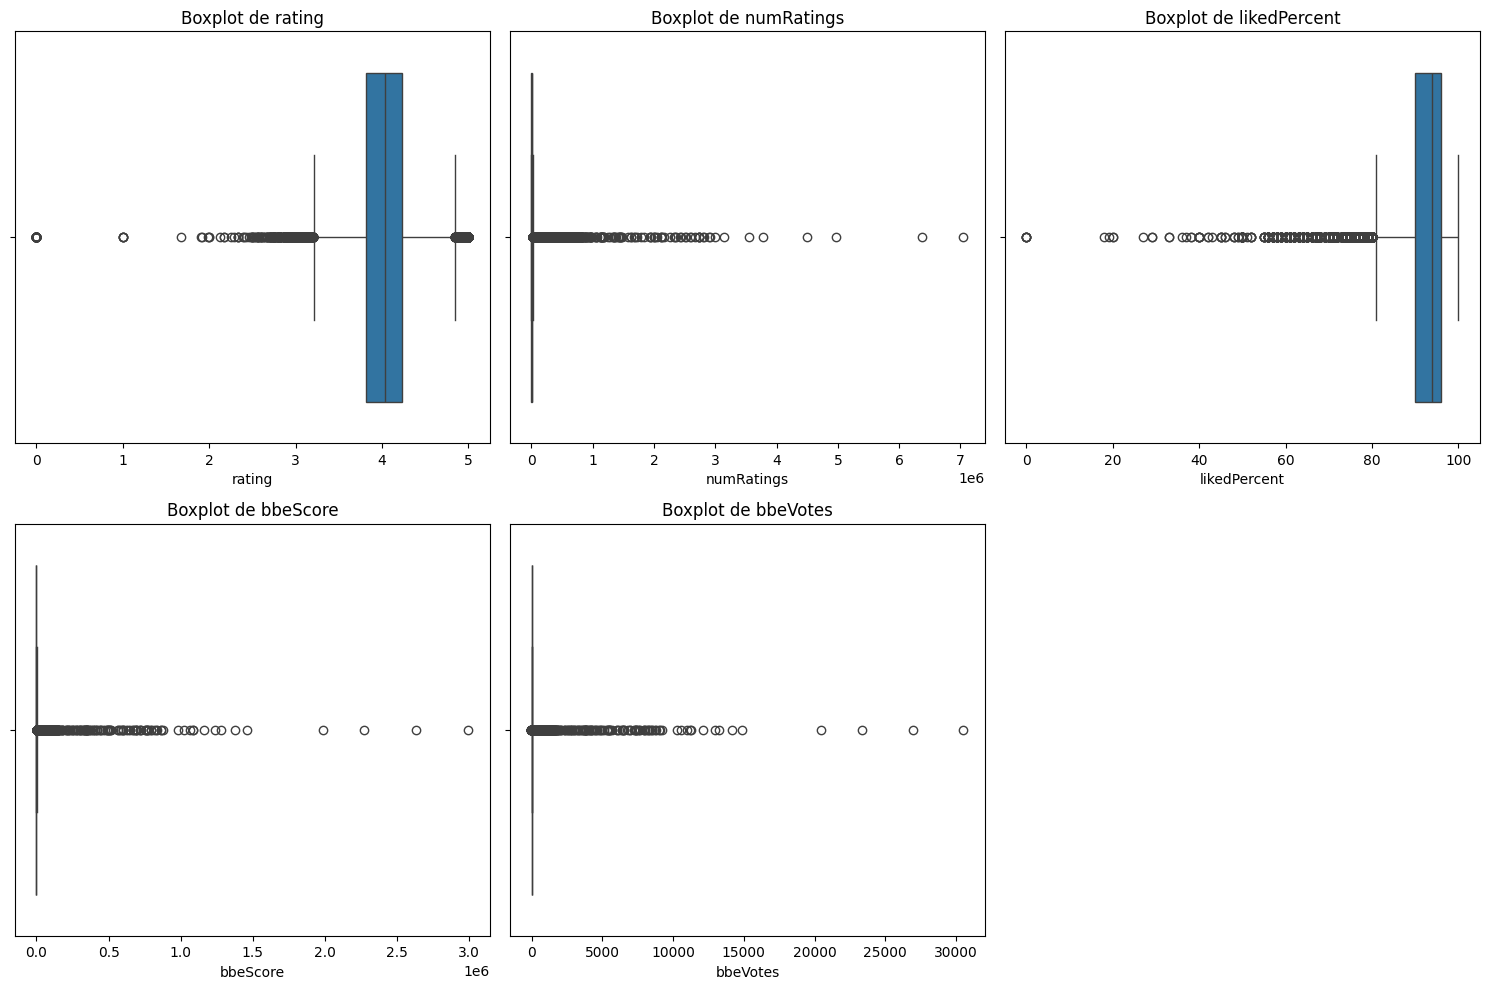

In [17]:
numeric_columns = data.select_dtypes(include=['int64', 'float64'])

# Calcular el número de filas y columnas para los subgráficos
num_vars = len(numeric_columns.columns)
num_rows = (num_vars // 3) + (1 if num_vars % 3 > 0 else 0)
num_cols = min(num_vars, 3)

# Configurar el tamaño de la figura
plt.figure(figsize=(15, 5*num_rows))

# Generar y mostrar los diagramas de caja para cada variable numérica
for i, col in enumerate(numeric_columns.columns):
    plt.subplot(num_rows, num_cols, i+1)
    sns.boxplot(x=data[col])
    plt.title("Boxplot de {}".format(col))
    plt.tight_layout()

plt.show()

**Se encontraron outliers en el dataset, más adelante voy a revisarlos e ir quitando estos valores según la importancia de los mismos.**

# Análisis Exploratorio

In [17]:
#Leo dataframe con datos "limpios"
data_clean

,bookId,title,series,author,rating,description,language,isbn,genres,characters,...,firstPublishDate,awards,numRatings,ratingsByStars,likedPercent,setting,coverImg,bbeScore,bbeVotes,price
0,2767052-the-hunger-games,The Hunger Games,The Hunger Games #1,Suzanne Collins,4.33,WINNING MEANS FAME AND FORTUNE.LOSING MEANS CE...,English,9780439023481,"['Young Adult', 'Fiction', 'Dystopia', 'Fantas...","['Katniss Everdeen', 'Peeta Mellark', 'Cato (H...",...,NaN,['Locus Award Nominee for Best Young Adult Boo...,6376780,"['3444695', '1921313', '745221', '171994', '93...",96.0,"['District 12, Panem', 'Capitol, Panem', 'Pane...",https://i.gr-assets.com/images/S/compressed.ph...,2993816,30516,5.09
1,2.Harry_Potter_and_the_Order_of_the_Phoenix,Harry Potter and the Order of the Phoenix,Harry Potter #5,"J.K. Rowling, Mary GrandPré (Illustrator)",4.50,There is a door at the end of a silent corrido...,English,9780439358071,"['Fantasy', 'Young Adult', 'Fiction', 'Magic',...","['Sirius Black', 'Draco Malfoy', 'Ron Weasley'...",...,06/21/03,['Bram Stoker Award for Works for Young Reader...,2507623,"['1593642', '637516', '222366', '39573', '14526']",98.0,['Hogwarts School of Witchcraft and Wizardry (...,https://i.gr-assets.com/images/S/compressed.ph...,2632233,26923,7.38
4,41865.Twilight,Twilight,The Twilight Saga #1,Stephenie Meyer,3.60,About three things I was absolutely positive.\...,English,9780316015844,"['Young Adult', 'Fantasy', 'Romance', 'Vampire...","['Edward Cullen', 'Jacob Black', 'Laurent', 'R...",...,10/05/05,"['Georgia Peach Book Award (2007)', 'Buxtehude...",4964519,"['1751460', '1113682', '1008686', '542017', '5...",78.0,"['Forks, Washington (United States)', 'Phoenix...",https://i.gr-assets.com/images/S/compressed.ph...,1459448,14874,2.1
5,19063.The_Book_Thief,The Book Thief,NaN,Markus Zusak (Goodreads Author),4.37,Librarian's note: An alternate cover edition c...,English,9780375831003,"['Historical Fiction', 'Fiction', 'Young Adult...","['Liesel Meminger', 'Hans Hubermann', 'Rudy St...",...,09/01/05,['National Jewish Book Award for Children’s an...,1834276,"['1048230', '524674', '186297', '48864', '26211']",96.0,"['Molching (Germany)', 'Germany']",https://i.gr-assets.com/images/S/compressed.ph...,1372809,14168,3.8
6,170448.Animal_Farm,Animal Farm,NaN,"George Orwell, Russell Baker (Preface), C.M. W...",3.95,Librarian's note: There is an Alternate Cover ...,English,9780451526342,"['Classics', 'Fiction', 'Dystopia', 'Fantasy',...","['Snowball', 'Napoleon', 'Clover', 'Boxer', 'O...",...,08/17/45,"['Prometheus Hall of Fame Award (2011)', 'Retr...",2740713,"['986764', '958699', '545475', '165093', '84682']",91.0,"['England', 'United Kingdom']",https://i.gr-assets.com/images/S/compressed.ph...,1276599,13264,4.42
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52470,11115191-attracted-to-fire,Attracted to Fire,NaN,DiAnn Mills (Goodreads Author),4.14,Special Agent Meghan Connors' dream of one day...,English,9781414348643,"['Christian Fiction', 'Christian', 'Suspense',...",[],...,September 16th 2011,['HOLT Medallion by Virginia Romance Writers N...,2143,"['945', '716', '365', '78', '39']",95.0,['West Texas (United States)'],https://i.gr-assets.com/images/S/compressed.ph...,0,1,5.55
52472,12395883-unbelievable,Unbelievable,Port Fare #2,Sherry Gammon (Goodreads Author),4.16,Lilah Lopez Dreser's in town to take care of u...,English,9781477594247,"['Romance', 'Young Adult', 'Contemporary', 'Co...",[],...,March 30th 2013,[],1028,"['442', '384', '142', '48', '12']",94.0,"['Port Fare, New York (United States)']",https://i.gr-assets.com/images/S/compressed.ph...,0,1,19.18
52475,10815662-marked,Marked,Soul Guardians #1,Kim Richardson (Goodreads Author),3.70,--READERS FAVORITE AWARDS WINNER 2011--Sixteen...,English,9781461017097,"['Fantasy', 'Young Adult', 'Paranormal', 'Ange...",[],...,March 15th 2011,"[""Readers' Favorite Book Award (2011)""]",6674,"['2109', '1868', '1660', '647', '390']",84.0,[],https://i.gr-

In [18]:
# Verifico cantidad de libros por tipo de formato
data_clean.language.value_counts()

,count
language,
English,32941
Spanish,511
French,479
German,415
Italian,173
Portuguese,143
Dutch,97
Turkish,96
Japanese,71


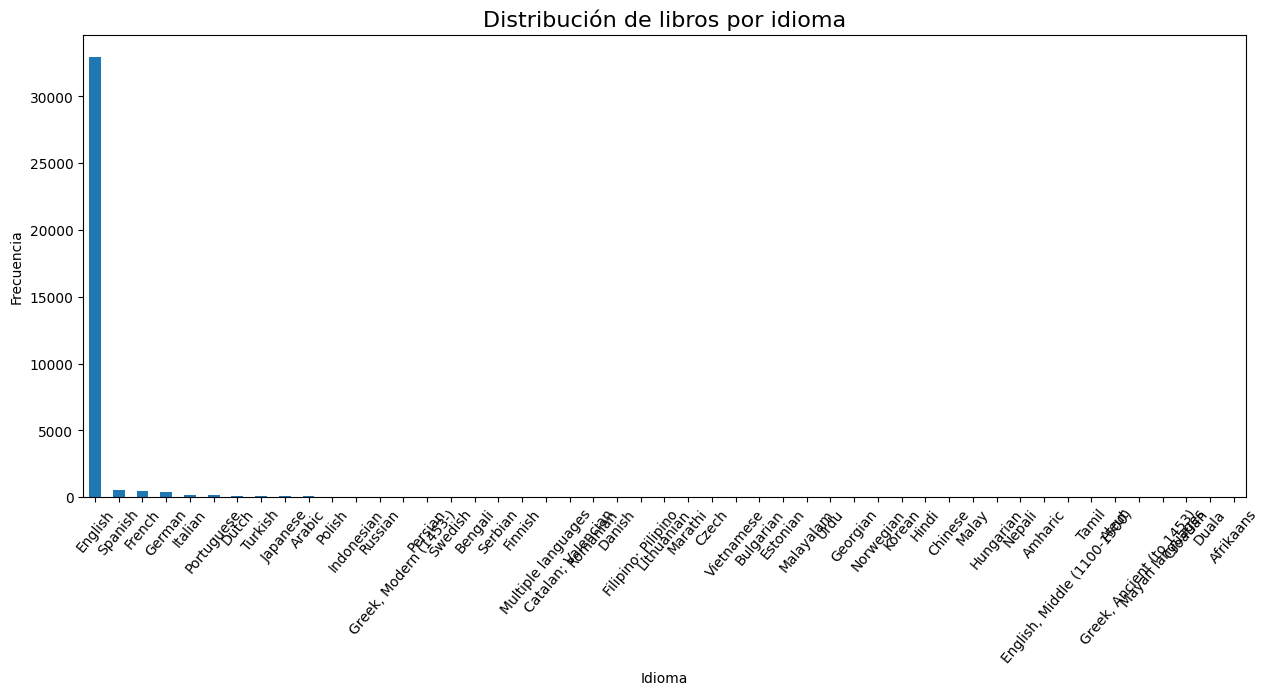

In [19]:
# Grafico cantidad de libros por tipo de formato

language_counts = data_clean['language'].value_counts()
plt.figure(figsize=(15, 6))
language_counts.plot(kind='bar')
plt.title('Distribución de libros por idioma', fontsize=16)
plt.xlabel('Idioma', fontsize=10)
plt.ylabel('Frecuencia', fontsize=10)

plt.xticks(rotation=50)
plt.show()


In [20]:
# En el dataframe solo voy a utilizar los libros escritos en Ingles
data_clean = data_clean[data_clean['language'] == 'English']

In [21]:
data_clean.language.value_counts()

,count
language,
English,32941


**Solo tengo los libros en inglés.**

In [24]:
# Redondeo el campo Rating
data_clean['Rating_entero'] = data_clean['rating'].astype(int)

<ipython-input-24-d8bb4ec5c345>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_clean['Rating_entero'] = data_clean['rating'].astype(int)


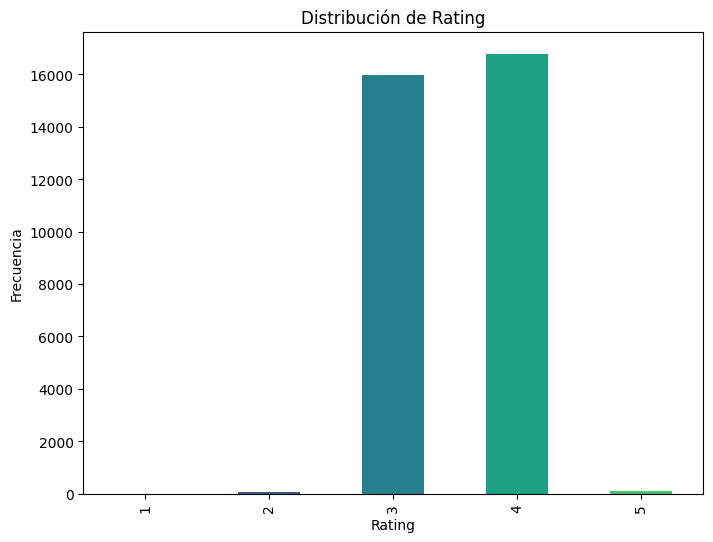

In [31]:
# Gráfico de barras para la Distribución de Rating
cat_counts = data_clean['Rating_entero'].value_counts().sort_index()

# Creo el gráfico de barras
plt.figure(figsize=(8, 6))
cat_counts.plot.bar(color=sns.color_palette('viridis'))
plt.title('Distribución de Rating')
plt.xlabel('Rating')
plt.ylabel('Frecuencia')
plt.show()

In [32]:
#Creo campo popularidad
def popularidad(popularity):
    if popularity < 3:
        return 0  # Baja
    elif 3 <= popularity < 4:
        return 1  # Medio
    else:
        return 2  # Alta

data_clean['popularidad'] = data_clean['rating'].apply(popularidad)

<ipython-input-32-5cc539803329>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_clean['popularidad'] = data_clean['rating'].apply(popularidad)


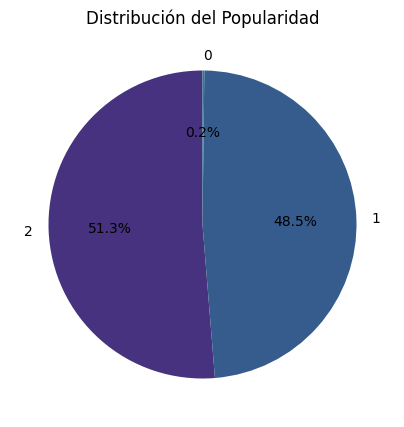

In [33]:
# Gráfico de torta para el género
cat_counts = data_clean['popularidad'].value_counts()
plt.figure(figsize=(5, 5))
cat_counts.plot.pie(autopct='%1.1f%%', startangle=90, colors=sns.color_palette('viridis'))
plt.title('Distribución del Popularidad')
plt.ylabel('')
plt.show()

In [30]:
# Creo una nueva columna que indica 1 si forma parte de una 'series' y 0 si no
data_clean['con_serie'] = data_clean['series'].notna().astype(int)

<ipython-input-30-8893f27244d7>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_clean['con_serie'] = data_clean['series'].notna().astype(int)


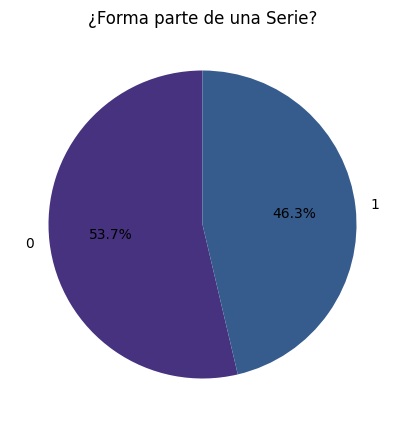

In [31]:
# Gráfico de torta para el género
cat_counts = data_clean['con_serie'].value_counts()

# Definir el tamaño del gráfico
plt.figure(figsize=(5, 5))

# Crear el gráfico de pastel
cat_counts.plot.pie(autopct='%1.1f%%', startangle=90, colors=sns.color_palette('viridis'))

# Añadir el título y eliminar la etiqueta del eje y
plt.title('¿Forma parte de una Serie?')
plt.ylabel('')

# Mostrar el gráfico
plt.show()

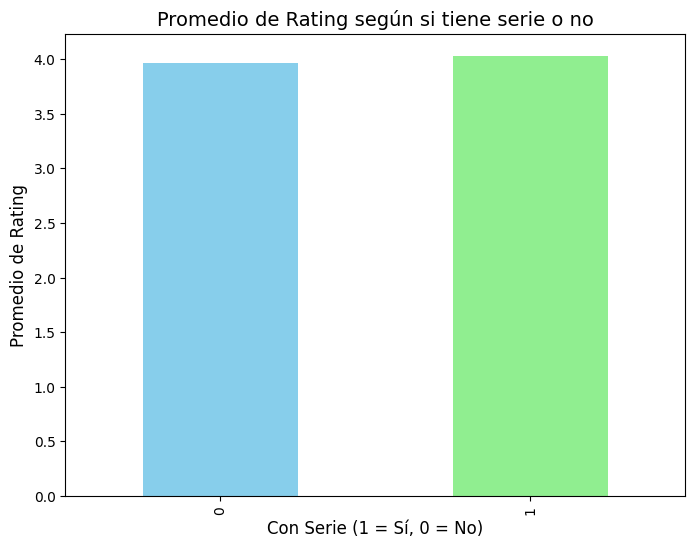

In [29]:
# Controlo ranting promedio por libro que forme parte de una serie o no
rating_promedio = data_clean.groupby('con_serie')['rating'].mean()

# Creo el gráfico
plt.figure(figsize=(8, 6))
rating_promedio.plot(kind='bar', color=['skyblue', 'lightgreen'])
plt.title('Promedio de Rating según si tiene serie o no', fontsize=14)
plt.xlabel('Con Serie (1 = Sí, 0 = No)', fontsize=12)
plt.ylabel('Promedio de Rating', fontsize=12)
plt.show()

**Los libros que forman parte de una serie son en general mejor puntuados**

In [23]:
data_clean.con_serie.value_counts()

,count
con_serie,
0,17683
1,15258


In [35]:
# Creo la columna 'con_premio' donde 1 significa que tiene premios y 0 si no tiene
data_clean['con_premio'] = data_clean['awards'].apply(lambda x: 1 if pd.notna(x) and x != '[]' else 0)

<ipython-input-35-d2020af6879a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_clean['con_premio'] = data_clean['awards'].apply(lambda x: 1 if pd.notna(x) and x != '[]' else 0)


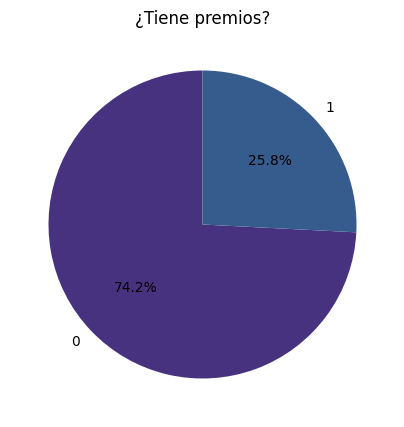

In [36]:
# Gráfico de torta para el premio
cat_counts = data_clean['con_premio'].value_counts()

# Definir el tamaño del gráfico
plt.figure(figsize=(5, 5))
cat_counts.plot.pie(autopct='%1.1f%%', startangle=90, colors=sns.color_palette('viridis'))
plt.title('¿Tiene premios?')
plt.ylabel('')
plt.show()

In [37]:
# Elimino los separadores de miles
data_clean['price'] = data_clean['price'].str.replace('.', '', regex=False)

# Convierto a números enteros
data_clean['price'] = pd.to_numeric(data_clean['price'], errors='coerce').astype(float)

<ipython-input-37-aba1e26dc3ff>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_clean['price'] = data_clean['price'].str.replace('.', '', regex=False)
<ipython-input-37-aba1e26dc3ff>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_clean['price'] = pd.to_numeric(data_clean['price'], errors='coerce').astype(float)


In [38]:
# Uso una expresión regular para extraer solo los números y convertir a enteros
data_clean['pages'] = data_clean['pages'].str.extract('(\d+)').astype(float)

<ipython-input-38-329c48a020dc>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_clean['pages'] = data_clean['pages'].str.extract('(\d+)').astype(float)


In [40]:
import ast

# Función para convertir strings que parecen listas en listas reales
def convert_to_list(val):
    if isinstance(val, str):
        try:
            return ast.literal_eval(val)
        except (ValueError, SyntaxError):
            return []
    return val if isinstance(val, list) else []

data_clean['ratingsByStars'] = data_clean['ratingsByStars'].apply(convert_to_list)
data_clean['ratingsByStars'] = data_clean['ratingsByStars'].apply(lambda x: [int(i) for i in x] if x else [0]*5)
data_clean['ratingsByStars'] = data_clean['ratingsByStars'].apply(lambda x: x + [0] * (5 - len(x)) if len(x) < 5 else x[:5])

# Divido el campo 'ratingsByStars' en cinco nuevas columnas
data_clean[['cant_stars_5', 'cant_stars_4', 'cant_stars_3', 'cant_stars_2', 'cant_stars_1']] = pd.DataFrame(data_clean['ratingsByStars'].tolist(), index=data_clean.index)


<ipython-input-40-ae294b0b5604>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_clean['ratingsByStars'] = data_clean['ratingsByStars'].apply(convert_to_list)
<ipython-input-40-ae294b0b5604>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_clean['ratingsByStars'] = data_clean['ratingsByStars'].apply(lambda x: [int(i) for i in x] if x else [0]*5)
<ipython-input-40-ae294b0b5604>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_index

In [41]:
# Función para convertir strings que parecen listas en listas reales
def convert_to_list(val):
    if isinstance(val, str):
        try:
            return ast.literal_eval(val)
        except (ValueError, SyntaxError):
            return []
    return val if isinstance(val, list) else []

data_clean['genres'] = data_clean['genres'].apply(convert_to_list)
data_clean['genres'] = data_clean['genres'].apply(lambda x: x + [0] * (5 - len(x)) if len(x) < 5 else x[:5])

# Dividir el campo 'genres' en cinco nuevas columnas
data_clean[['genres_5', 'genres_4', 'genres_3', 'genres_2', 'genres_1']] = pd.DataFrame(data_clean['genres'].tolist(), index=data_clean.index)

<ipython-input-41-03bcdb22355c>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_clean['genres'] = data_clean['genres'].apply(convert_to_list)
<ipython-input-41-03bcdb22355c>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_clean['genres'] = data_clean['genres'].apply(lambda x: x + [0] * (5 - len(x)) if len(x) < 5 else x[:5])
<ipython-input-41-03bcdb22355c>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = va

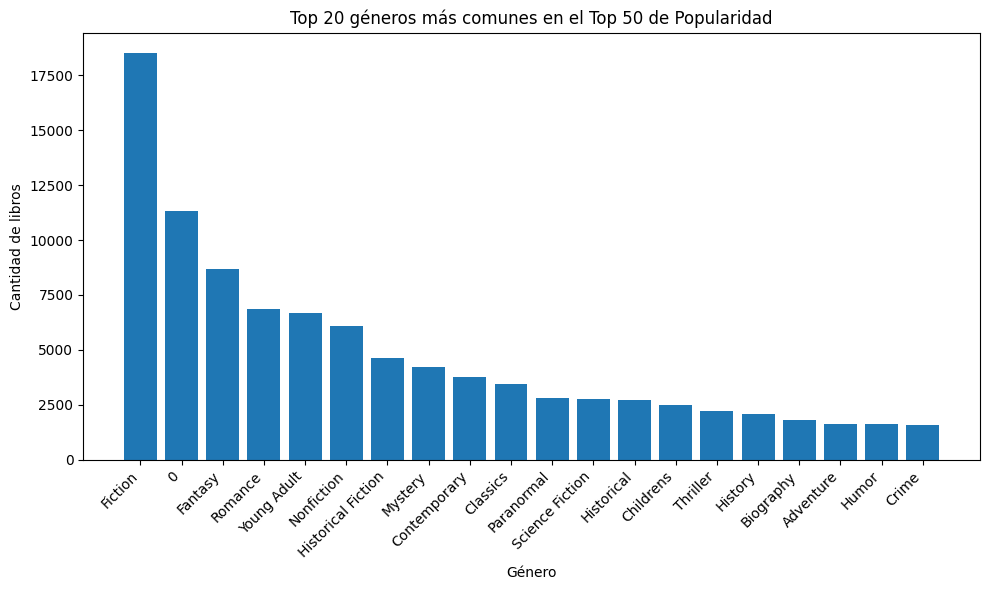

In [43]:
# Combinar todos los campos de géneros en una sola columna y eliminar valores nulos
combined_genres = pd.concat([data_clean['genres_5'],
                             data_clean['genres_4'],
                             data_clean['genres_3'],
                             data_clean['genres_2'],
                             data_clean['genres_1']]).dropna()

genre_counts = combined_genres.value_counts()
top_20_genres = genre_counts.head(20)
top_20_genres.index = top_20_genres.index.astype(str)

# Creo gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(top_20_genres.index, top_20_genres.values)
plt.xlabel('Género')
plt.ylabel('Cantidad de libros')
plt.title('Top 20 géneros más comunes en el Top 50 de Popularidad')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


<ipython-input-44-154cff983ce0>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_clean['ficcion'] = data_clean[['genres_5', 'genres_4', 'genres_3', 'genres_2', 'genres_1']].apply(


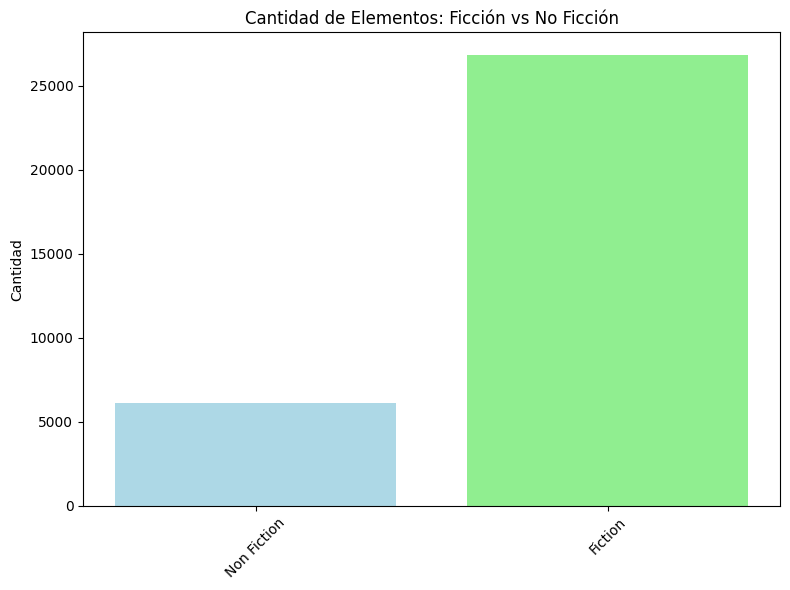

In [44]:
# Creo una nueva columna 'ficcion'
# Creo el método 'contains' para verificar si alguna columna contiene 'Non Fiction' o 'NonFiction'
data_clean['ficcion'] = data_clean[['genres_5', 'genres_4', 'genres_3', 'genres_2', 'genres_1']].apply(
    lambda row: 0 if row.str.contains('Non Fiction|NonFiction', case=False, regex=True).any() else 1, axis=1)


ficcion_counts = data_clean['ficcion'].value_counts()
labels = ['Non Fiction', 'Fiction']
sizes = [ficcion_counts.get(0, 0), ficcion_counts.get(1, 0)]

# Creo gráfico de barras
plt.figure(figsize=(8, 6))
plt.bar(labels, sizes, color=['lightblue', 'lightgreen'])
plt.title('Cantidad de Elementos: Ficción vs No Ficción')
plt.ylabel('Cantidad')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


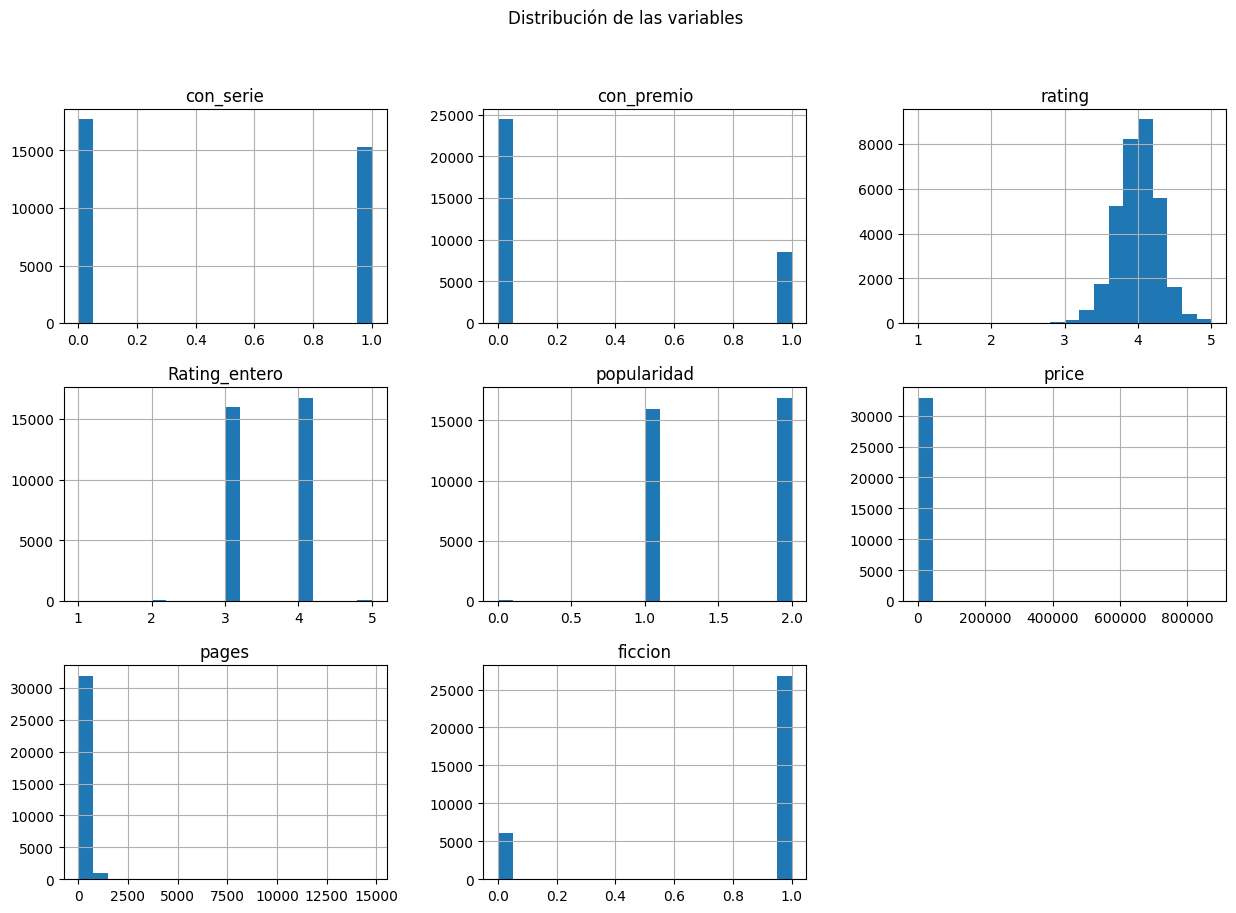

In [45]:
# Veo la distribución de las columnas numericas

numerical_columns = ['con_serie', 'con_premio', 'rating', 'Rating_entero', 'popularidad', 'price', 'pages', 'ficcion' ]

data_clean[numerical_columns].hist(bins=20, figsize=(15, 10))
plt.suptitle('Distribución de las variables')
plt.show()

## Análisis de los Top 50

In [46]:
# Creo dataframe ordenado por 'rating' de forma descendente, y luego por 'cant_stars_5' también en forma descendente
top_50_books = data_clean.sort_values(by=['rating', 'cant_stars_5'], ascending=[False, False]).head(50)

In [47]:
top_50_books

,bookId,title,series,author,rating,description,language,isbn,genres,characters,...,cant_stars_4,cant_stars_3,cant_stars_2,cant_stars_1,genres_5,genres_4,genres_3,genres_2,genres_1,ficcion
27097,34208038-the-battle-for-innocence,The Battle for Innocence,Montgomery Lake High #4,Stacy A. Padula (Goodreads Author),5.0,This is an Alternate Cover Edition for B00JQZ9...,English,9781628577778,"[0, 0, 0, 0, 0]",[],...,0,0,0,0,0,0,0,0,0,1
32454,24873017-why-are-you-a-vegan-and-other-wacky-v...,Why Are You a Vegan? and Other Wacky Verse for...,NaN,Violet's Vegan Comics,5.0,A compilation of Violet's Vegan Comics' favour...,English,9781505874310,"[Poetry, 0, 0, 0, 0]",[],...,0,0,0,0,Poetry,0,0,0,0,1
19997,25358831-american-icarus,American Icarus: A Memoir of Father and Country,NaN,Pythia Peay (Goodreads Author),5.0,This is the story of Joe Carroll: fully paid-u...,English,9781590564417,"[0, 0, 0, 0, 0]",[],...,0,0,0,0,0,0,0,0,0,1
20940,42643696-forty-ways-to-square-a-circle,Forty Ways to Square a Circle,NaN,Neil Hummasti,5.0,The year is 1996 and the coastal high school w...,English,9781732285101,"[0, 0, 0, 0, 0]",[],...,0,0,0,0,0,0,0,0,0,1
4405,17608096-obscured-darkness,Obscured Darkness (Family Secrets #2),NaN,Rebekah McClew (Goodreads Author),5.0,"In the second book of the series, fleeing for ...",English,9780983002284,"[0, 0, 0, 0, 0]",[],...,0,0,0,0,0,0,0,0,0,1
17909,5206353-what-happened-to-suzy,What Happened to Suzy,NaN,Carol Simms-Mitchell,5.0,Although this story is fiction it is based on ...,English,9781606933527,"[0, 0, 0, 0, 0]",[],...,0,0,0,0,0,0,0,0,0,1
20203,29206290-multilingual-digital-marketing,Multilingual Digital Marketing: Become the Mar...,NaN,Maria Johnsen (Goodreads Author),5.0,There is always a million dollar question as t...,English,9781523969395,"[0, 0, 0, 0, 0]",[],...,0,0,0,0,0,0,0,0,0,1
23539,53033618-everyday-a-holes,Everyday A**holes: Drawings By Dean Blake,NaN,Dean Blake (Goodreads Author),5.0,Everyday Assholes by Dean Blake - for the firs...,English,9780992369026,"[0, 0, 0, 0, 0]",[],...,0,0,0,0,0,0,0,0,0,1
31372,15849318-and-the-man-who-loved-cats,...and the man who loved cats,NaN,D.M. Samson (Goodreads Author),5.0,"""""... and the man who loved cats"""" is a collec...",English,9780955679643,"[0, 0, 0, 0, 0]",[],...,0,0,0,0,0,0,0,0,0,1
18750,17160913-weeds,Weeds,NaN,McGuffy Ann Morris (Goodreads Author),5.0,Poetry based upon life experience and observat...,English,9781477674611,"[0, 0, 0, 0, 0]",[],...,0,0,0,0,0,0,0,0,0,1


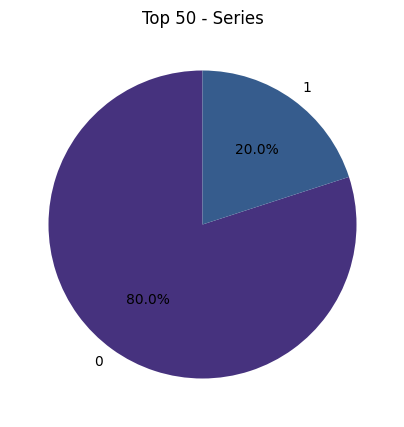

In [48]:
# Gráfico de torta para el género
cat_counts = top_50_books['con_serie'].value_counts()

plt.figure(figsize=(5, 5))
cat_counts.plot.pie(autopct='%1.1f%%', startangle=90, colors=sns.color_palette('viridis'))
plt.title('Top 50 - Series')
plt.ylabel('')
plt.show()

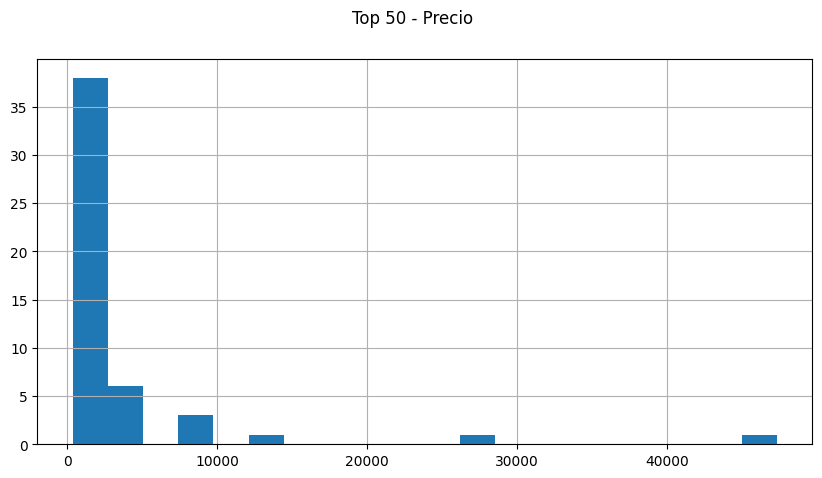

In [49]:
# Veo la distribución de precio

top_50_books['price'].hist(bins=20, figsize=(10, 5))
plt.suptitle('Top 50 - Precio')
plt.show()

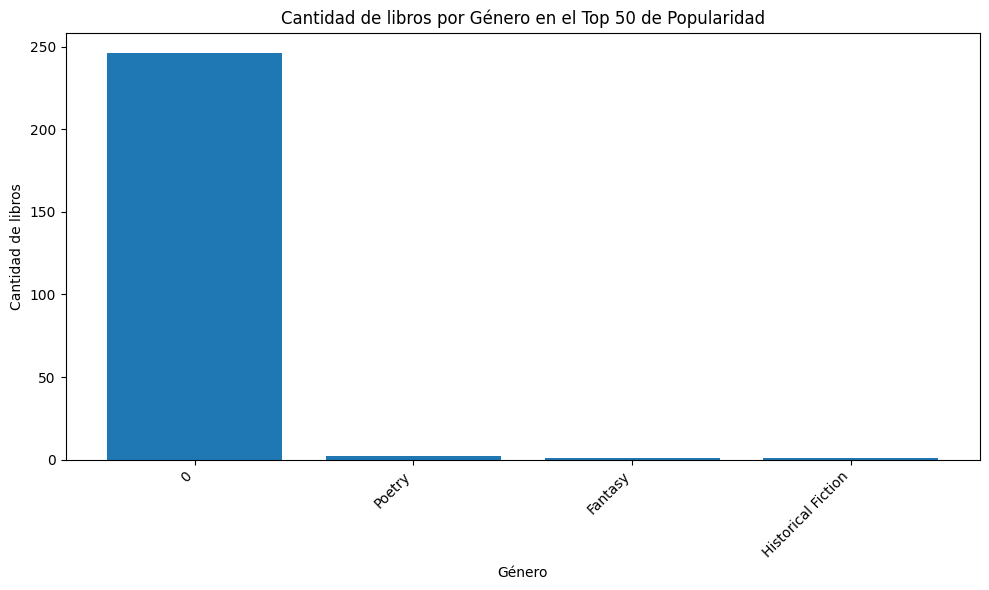

In [50]:
# Cantidad de libros por Género en el Top 50 de Popularidad
combined_genres = pd.concat([top_50_books['genres_5'],
                             top_50_books['genres_4'],
                             top_50_books['genres_3'],
                             top_50_books['genres_2'],
                             top_50_books['genres_1']]).dropna()

# Contar la cantidad de libros en cada género
genre_counts = combined_genres.value_counts()
genre_counts.index = genre_counts.index.astype(str)
plt.figure(figsize=(10, 6))
plt.bar(genre_counts.index, genre_counts.values)
plt.xlabel('Género')
plt.ylabel('Cantidad de libros')
plt.title('Cantidad de libros por Género en el Top 50 de Popularidad')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


## Modelos

In [51]:
data_clean['likedPercent']

,likedPercent
0,96.0
1,98.0
4,78.0
5,96.0
6,91.0
...,...
52470,95.0
52472,94.0
52475,84.0
52476,90.0


In [52]:
# Selecciono las columnas deseadas para crear el dataframe data_model
data_model = data_clean[['pages', 'likedPercent', 'con_serie',
                         'con_premio', 'cant_stars_5',
                         'cant_stars_4', 'cant_stars_3', 'cant_stars_2',
                         'cant_stars_1', 'ficcion', 'price', 'Rating_entero']]


In [53]:
data_model

,pages,likedPercent,con_serie,con_premio,cant_stars_5,cant_stars_4,cant_stars_3,cant_stars_2,cant_stars_1,ficcion,price,Rating_entero
0,374.0,96.0,1,1,3444695,1921313,745221,171994,93557,1,509.0,4
1,870.0,98.0,1,1,1593642,637516,222366,39573,14526,1,738.0,4
4,501.0,78.0,1,1,1751460,1113682,1008686,542017,548674,1,21.0,3
5,552.0,96.0,0,1,1048230,524674,186297,48864,26211,1,38.0,4
6,141.0,91.0,0,1,986764,958699,545475,165093,84682,1,442.0,3
...,...,...,...,...,...,...,...,...,...,...,...,...
52470,416.0,95.0,0,1,945,716,365,78,39,1,555.0,4
52472,360.0,94.0,1,0,442,384,142,48,12,1,1918.0,4
52475,280.0,84.0,1,1,2109,1868,1660,647,390,1,737.0,3
52476,507.0,90.0,0,0,77,78,59,19,5,1,286.0,3


## Predicción Rating

Creo un modelo en LinearRegression para predicir el valor que puede tener el rating según algunas propiedades de los libros.

In [54]:
X = data_model.drop('Rating_entero', axis=1)
y = data_model['Rating_entero']

In [55]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear el modelo de regresión lineal
model = LinearRegression()

# Entrenar el modelo
model.fit(X_train, y_train)

# Hacer predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

# Evaluar el rendimiento del modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error (MSE): {mse}')
print(f'R² Score: {r2}')



Mean Squared Error (MSE): 0.14833209363111385
R² Score: 0.42445241274816825


**El dato de MSE es bajo.** Es decir que las predicciones están cercanas a los valores reales, pero no son perfectas.


**El dato de R² no es tan bueno.** El poder predictivo del modelo es limitado, ya que más de la mitad de la variabilidad en los datos aún no está siendo explicada.

## Predicción Precio

Creo un modelo en LinearRegression para predicir el valor que puede tener el campo precio según algunas propiedades de los libros.

In [56]:
X = data_model.drop('price', axis=1)
y = data_model['price']

In [57]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear el modelo de regresión lineal
model = LinearRegression()

# Entrenar el modelo
model.fit(X_train, y_train)

# Hacer predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

# Evaluar el rendimiento del modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error (MSE): {mse}')
print(f'R² Score: {r2}')

Mean Squared Error (MSE): 4596383.199020598
R² Score: 0.021447295705384284


**Para este modelo el valor del MSE es alto.** Las predicciones del modelo están muy lejos de los valores reales, lo que indica un mal ajuste.


**Por otra parte el R² bajo.** El modelo no está explicando la variabilidad de los datos, lo que indica un bajo poder predictivo.

# Conclusiones Generales

Los modelos que he creado no han sido del todo performantes. Para mejorar la predicción tanto de los precios como la de rating debo realizar las siguientes acciones:

*   Verificar los campos más óptimo
*   Probar otros modelos
*   Hacer ingeniería de características
*   Validación cruzada


# Anexos

Creo una interfaz utilizando las librerias de Gradio para poder predecir tanto los valores del campo precio como del campo rating.

In [58]:
!pip install gradio

INFO: pip is looking at multiple versions of gradio to determine which version is compatible with other requirements. This could take a while.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.4/50.4 kB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.3/42.3 MB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 319.8/319.8 kB 9.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.7/94.7 kB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.4/76.4 kB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.0/78.0 kB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 436.6/436.6 kB 19.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 141.9/141.9 kB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.9/10.9 MB 24.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.7/63.7 kB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 3.6 MB/s e

## Creo una interfaz para predecir el dato de Rating

In [59]:
import gradio as gr

def train_model():
    X = data_clean[['pages', 'likedPercent', 'con_serie', 'con_premio',
                    'cant_stars_5', 'cant_stars_4', 'cant_stars_3', 'cant_stars_2',
                    'cant_stars_1', 'ficcion', 'price']]
    y = data_clean['Rating_entero']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    model = LinearRegression()

    model.fit(X_train, y_train)
    return model

model = train_model()

def predict_rating(pages, likedPercent, con_serie, con_premio, cant_stars_5,
                   cant_stars_4, cant_stars_3, cant_stars_2, cant_stars_1, ficcion, price):

    input_data = np.array([[pages, likedPercent, con_serie, con_premio,
                            cant_stars_5, cant_stars_4, cant_stars_3, cant_stars_2,
                            cant_stars_1, ficcion, price]])

    prediction = model.predict(input_data)

    return prediction[0]

# Creo la interfaz de usuario con Gradio
gr.Interface(
    fn=predict_rating,
    inputs=[
        gr.Number(label="Páginas"),
        gr.Number(label="Porcentaje de Likes"),
        gr.Number(label="¿Es parte de una serie? (1 = Sí, 0 = No)"),
        gr.Number(label="¿Tiene premio? (1 = Sí, 0 = No)"),
        gr.Number(label="Cantidad de estrellas 5"),
        gr.Number(label="Cantidad de estrellas 4"),
        gr.Number(label="Cantidad de estrellas 3"),
        gr.Number(label="Cantidad de estrellas 2"),
        gr.Number(label="Cantidad de estrellas 1"),
        gr.Number(label="¿Es ficción? (1 = Sí, 0 = No)"),
        gr.Number(label="Precio")
    ],  # Entradas de la interfaz
    outputs=gr.Number(label="Predicción del Rating"),
    title="Predicción de Rating",
    description="Introduce las características del libro para predecir su rating.",
    allow_flagging='never'  # Eliminar el botón "Flag"
).launch()


/usr/local/lib/python3.10/dist-packages/gradio/interface.py:393: UserWarning: The `allow_flagging` parameter in `Interface` is deprecated.Use `flagging_mode` instead.
  warnings.warn(


Running Gradio in a Colab notebook requires sharing enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://c7ab78e5a2102c984f.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


## Creo interfaz para predecir el precio

In [60]:
import gradio as gr

def train_model():
    X = data_clean[['pages', 'likedPercent', 'con_serie', 'con_premio',
                    'cant_stars_5', 'cant_stars_4', 'cant_stars_3', 'cant_stars_2',
                    'cant_stars_1', 'ficcion']]
    y = data_clean['price']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    model = LinearRegression()

    model.fit(X_train, y_train)
    return model

model = train_model()

def predict_price(pages, likedPercent, con_serie, con_premio, cant_stars_5,
                   cant_stars_4, cant_stars_3, cant_stars_2, cant_stars_1, ficcion):

    input_data = np.array([[pages, likedPercent, con_serie, con_premio,
                            cant_stars_5, cant_stars_4, cant_stars_3, cant_stars_2,
                            cant_stars_1, ficcion]])

    prediction = model.predict(input_data)

    return prediction[0]

# Creo la interfaz de usuario con Gradio
gr.Interface(
    fn=predict_price,
    inputs=[
        gr.Number(label="Páginas"),
        gr.Number(label="Porcentaje de Likes"),
        gr.Number(label="¿Es parte de una serie? (1 = Sí, 0 = No)"),
        gr.Number(label="¿Tiene premio? (1 = Sí, 0 = No)"),
        gr.Number(label="Cantidad de estrellas 5"),
        gr.Number(label="Cantidad de estrellas 4"),
        gr.Number(label="Cantidad de estrellas 3"),
        gr.Number(label="Cantidad de estrellas 2"),
        gr.Number(label="Cantidad de estrellas 1"),
        gr.Number(label="¿Es ficción? (1 = Sí, 0 = No)")
    ],  # Entradas de la interfaz
    outputs=gr.Number(label="Predicción del Precio"),  # Salida: el valor de Rating_entero
    title="Predicción de Precio",
    description="Introduce las características del libro para predecir su precio.",
    allow_flagging='never'  # Eliminar el botón "Flag"
).launch()

/usr/local/lib/python3.10/dist-packages/gradio/interface.py:393: UserWarning: The `allow_flagging` parameter in `Interface` is deprecated.Use `flagging_mode` instead.
  warnings.warn(


Running Gradio in a Colab notebook requires sharing enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://d1bb68a2573b7a63c1.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


## Creo interfaz para ver todos los elementos del dataframe

In [61]:
import gradio as gr

def buscar_libros(title, con_serie, rating, con_premio):
    filtered_df = data_clean[
        (data_clean['title'].str.contains(title, case=False, na=False)) &
        (data_clean['con_serie'] == con_serie) &
        (data_clean['Rating_entero'] == rating) &
        (data_clean['con_premio'] == con_premio)
    ]

    if filtered_df.empty:
        return "No se encontraron resultados."

    result = filtered_df.to_html(index=False, justify='left', classes='table table-striped')

    result += """
    <style>
    table {
        width: 100%;
        margin: auto;
        font-family: Arial, sans-serif;
        border-collapse: collapse;
        text-align: left;
    }
    th, td {
        padding: 8px 12px;
        border-bottom: 1px solid #ddd;
    }
    tr:nth-child(even) {background-color: #f2f2f2;}
    th {
        background-color: #f2f2f2;
        color: black;
    }
    </style>
    """

    return result

# Crear la interfaz con Gradio
iface = gr.Interface(
    fn=buscar_libros,
    inputs=[
        gr.Textbox(label="Título (puede estar en blanco para buscar todos)"),
        gr.Radio([1, 0], label="¿Es parte de una serie? (1=Sí, 0=No)", value=1),
        gr.Slider(1, 5, step=1, label="Valoración (1 a 5)"),
        gr.Radio([1, 0], label="¿Tiene premio? (1=Sí, 0=No)", value=1)
    ],
    outputs="html",
    title="Buscador de Libros",
    description="Ingresa los criterios de búsqueda para encontrar libros en la base de datos."
)

# Ejecutar la interfaz
iface.launch()

Running Gradio in a Colab notebook requires sharing enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://c7d939ac9f80b8520d.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
